In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error 

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn1\train_.csv',header=None)
df.sample(5)


0          1
23 -0.191356  30.093170
60 -0.593420  -8.420375
49 -0.725815 -36.029394
46 -0.593137  10.869882
3   1.175814  -5.317791

In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

#Performed Min-Max scaling to bring data between 0 to 1
scaled_X = sx.fit_transform(df.drop(1,axis='columns'))
scaled_y = sy.fit_transform(df[1].values.reshape(df.shape[0],1))

# scaled_X
# scaled_y

In [4]:
scaled_X=np.array(df.iloc[:,0])
scaled_y=np.array(df.iloc[:,1])
scaled_X,scaled_y

(array([-1.62242 ,  1.424165,  0.709026,  1.175814,  1.365642,  0.358937,
         1.899735, -1.658713, -1.447432,  1.199654, -0.312256,  0.886735,
         1.414912,  0.147447, -0.995875, -0.217057,  0.516099,  0.527311,
         1.524083, -0.63071 ,  0.448653, -1.034918,  0.517147, -0.191356,
         1.578041,  0.701918, -0.206759, -1.531524,  1.193891, -0.296885,
        -0.638623, -1.07357 , -1.364634, -0.005179,  1.92894 ,  1.442023,
         0.974618, -0.132505,  1.38285 , -1.7983  , -1.493627, -0.111769,
         0.85013 , -1.104039,  1.170699, -0.443484, -0.593137,  0.30373 ,
        -0.071979, -0.725815, -0.467983, -1.155796,  0.772142,  1.821344,
        -1.430386, -0.023223,  1.481162,  1.923548,  0.698581, -1.81291 ,
        -0.59342 ,  1.479929, -0.034839,  0.521963,  1.744925,  0.382686,
         0.703322, -0.733151, -1.403288,  0.994859]),
 array([ 7.26595690e+02, -2.76584355e+02,  4.20538100e+00, -5.31779100e+00,
        -1.72438086e+02,  3.67091130e+01, -3.54545867e+0

In [5]:
# scaled_y.reshape(70,)
# scaled_X.shape[0]
scaled_X=scaled_X.reshape(-1,1)
scaled_X.shape

(70, 1)

In [6]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.001):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 1 (x)
    w = np.ones(shape=(number_of_features))   #Initializing weights as 1
    b = 0 #Initializing bias as 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b     #Y=w*X+b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
         
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),3000)
w, b, cost

(array([-540.51738841]), -84.31697850532765, 536212.6810036158)

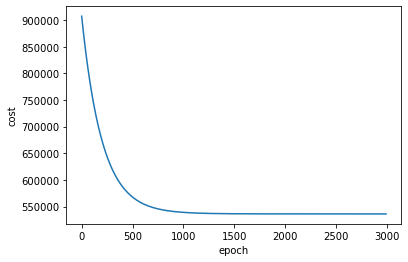

In [7]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [8]:
# sy.inverse_transform([[1]])[0][0]
scaled_X.shape


(70, 1)

In [9]:
def Batch_GD_predict(x,w,b):
    scaled_X = x #sx.transform([[x]])
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*x + bias
    # scaled_X[0] is x
    scaled_y_pred = w[0] * scaled_X[10] + b
    return scaled_y_pred
    # print(scaled_y)
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    # return sy.inverse_transform([scaled_y])[0][0]  #Inverse transform converts scaled prediction to actual value

Batch_GD_predict(scaled_X,w,b)

array([84.46281913])

In [10]:
# scaled_X.shape
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=3)  #Degree of Polynomial fit
X_train_D3_sort=np.sort(scaled_X)
X_train_D3_trans = poly.fit_transform(X_train_D3_sort)


[[ -41.37215957 -541.11121884]]
-42.37215956749757
732.2650037518817


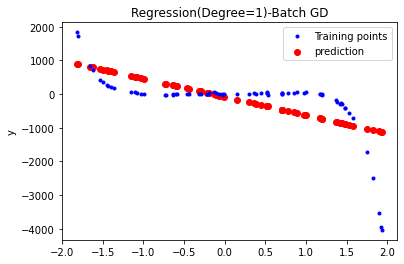

In [11]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=1)  #Degree of Polynomial fit
X_train_D3_sort=np.sort(scaled_X)
X_train_D3_trans = poly.fit_transform(X_train_D3_sort)

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_train_D3_trans,scaled_y.reshape(scaled_y.shape[0],),10000)
# w, b, cost

w=w.reshape(-1,1).T  #.shape
X_train_D3_trans=X_train_D3_trans.T  #.shape
# b#
# w.shape,X_train_D3_trans.shape
scaled_y_pred = np.dot(w,X_train_D3_trans) + b
print(w)
print(b)
print(np.sqrt(cost))


plt.ylabel("y")
plt.title("Regression(Degree=1)-Batch GD")
plt.plot(scaled_X,scaled_y, "b.",label="Training points")
plt.scatter(scaled_X,scaled_y_pred.T, c="r",label="prediction")
plt.legend()
plt.show()

[[ 117.89627044 -497.55571447 -273.15561475]]
116.89627044406689
669.0879781456066


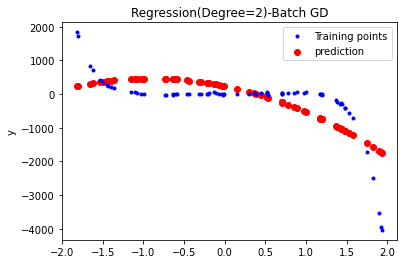

In [12]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=2)  #Degree of Polynomial fit
X_train_D3_sort=np.sort(scaled_X)
X_train_D3_trans = poly.fit_transform(X_train_D3_sort)

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_train_D3_trans,scaled_y.reshape(scaled_y.shape[0],),10000)
# w, b, cost

w=w.reshape(-1,1).T  #.shape
X_train_D3_trans=X_train_D3_trans.T  #.shape
# b#
# w.shape,X_train_D3_trans.shape
scaled_y_pred = np.dot(w,X_train_D3_trans) + b
print(w)
print(b)
print(np.sqrt(cost))



plt.ylabel("y")
plt.title("Regression(Degree=2)-Batch GD")
plt.plot(scaled_X,scaled_y, "b.",label="Training points")
plt.scatter(scaled_X,scaled_y_pred.T, c="r",label="prediction")
plt.legend()
plt.show()

[[  53.71041685  686.82464874 -148.71106367 -547.12402819]]
52.7104168455427
325.3788110502798


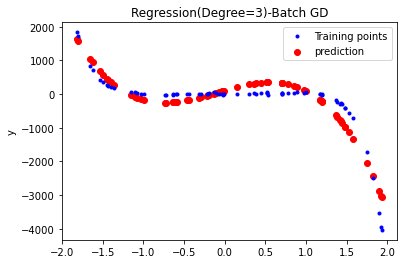

In [13]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=3)  #Degree of Polynomial fit
X_train_D3_sort=np.sort(scaled_X)
X_train_D3_trans = poly.fit_transform(X_train_D3_sort)

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_train_D3_trans,scaled_y.reshape(scaled_y.shape[0],),10000)
# w, b, cost

w=w.reshape(-1,1).T  #.shape
X_train_D3_trans=X_train_D3_trans.T  #.shape
scaled_y_pred = np.dot(w,X_train_D3_trans) + b
print(w)
print(b)
print(np.sqrt(cost))



plt.ylabel("y")
plt.title("Regression(Degree=3)-Batch GD")
plt.plot(scaled_X,scaled_y, "b.",label="Training points")
plt.scatter(scaled_X,scaled_y_pred.T, c="r",label="prediction")
plt.legend()
plt.show()

[[ -31.9387687   572.32301217  363.27874353 -485.09442247 -168.15723516]]
-32.938768702627414
269.7778151352398


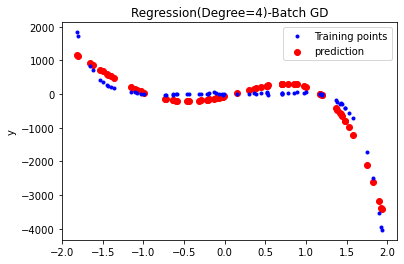

In [14]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=4)  #Degree of Polynomial fit
X_train_D3_sort=np.sort(scaled_X)
X_train_D3_trans = poly.fit_transform(X_train_D3_sort)

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_train_D3_trans,scaled_y.reshape(scaled_y.shape[0],),10000)
# w, b, cost

w=w.reshape(-1,1).T  #.shape
X_train_D3_trans=X_train_D3_trans.T  #.shape
# b#
# w.shape,X_train_D3_trans.shape
scaled_y_pred = np.dot(w,X_train_D3_trans) + b
print(w)
print(b)
print(np.sqrt(cost))



plt.ylabel("y")
plt.title("Regression(Degree=4)-Batch GD")
plt.plot(scaled_X,scaled_y, "b.",label="Training points")
plt.scatter(scaled_X,scaled_y_pred.T, c="r",label="prediction")
plt.legend()
plt.show()

[[  -8.91420013  -13.6275697   150.18888243  331.01984303  -80.27998189
  -210.26165734]]
-9.914200132596175
80.57555508229582


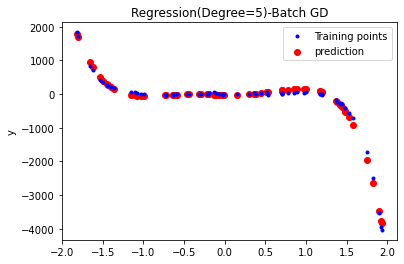

In [15]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=5)  #Degree of Polynomial fit
X_train_D3_sort=np.sort(scaled_X)
X_train_D3_trans = poly.fit_transform(X_train_D3_sort)

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_train_D3_trans,scaled_y.reshape(scaled_y.shape[0],),10000)
# w, b, cost

w=w.reshape(-1,1).T  #.shape
X_train_D3_trans=X_train_D3_trans.T  #.shape
# b#
# w.shape,X_train_D3_trans.shape
scaled_y_pred = np.dot(w,X_train_D3_trans) + b
print(w)
print(b)
print(np.sqrt(cost))



plt.ylabel("y")
plt.title("Regression(Degree=5)-Batch GD")
plt.plot(scaled_X,scaled_y, "b.",label="Training points")
plt.scatter(scaled_X,scaled_y_pred.T, c="r",label="prediction")
plt.legend()
plt.show()


In [16]:
df_test = pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn1\test.csv',header=None)
df_test.sample(5)


0            1
11  1.211497   -44.888335
9  -1.743581  1292.647937
23 -0.777543     8.837633
24 -0.452894   -22.908917
18 -0.482446    23.978640

In [17]:
from sklearn.preprocessing import PolynomialFeatures


In [18]:

# sorted_x_20=np.sort(scaled_X)
# scaled_X
poly1d=PolynomialFeatures(degree=1)
poly2d=PolynomialFeatures(degree=2)
poly3d=PolynomialFeatures(degree=3)
poly4d=PolynomialFeatures(degree=4)
X1 = poly1d.fit_transform(np.array(scaled_X).reshape(-1, 1))
X2 = poly2d.fit_transform(np.array(scaled_X).reshape(-1, 1))
X3 = poly3d.fit_transform(np.array(scaled_X).reshape(-1, 1))
X4 = poly4d.fit_transform(np.array(scaled_X).reshape(-1, 1))
# X2

## MINI BATCH GD


In [19]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 20, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([-539.78597128]), -84.32659600893493, 1838585.84322334)

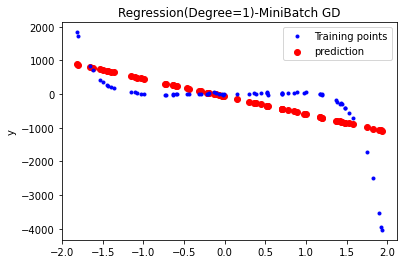

In [20]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=1)  #Degree of Polynomial fit
X_train_D3_sort=np.sort(scaled_X)
X_train_D3_trans = poly.fit_transform(X_train_D3_sort)

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(X_train_D3_trans,scaled_y.reshape(scaled_y.shape[0],))
# w, b, cost

w=w.reshape(-1,1).T  #.shape
X_train_D3_trans=X_train_D3_trans.T  #.shape
# b#
# w.shape,X_train_D3_trans.shape
scaled_y_pred = np.dot(w,X_train_D3_trans) + b


plt.ylabel("y")
plt.title("Regression(Degree=1)-MiniBatch GD")
plt.plot(scaled_X,scaled_y, "b.",label="Training points")
plt.scatter(scaled_X,scaled_y_pred.T, c="r",label="prediction")
plt.legend()
plt.show()

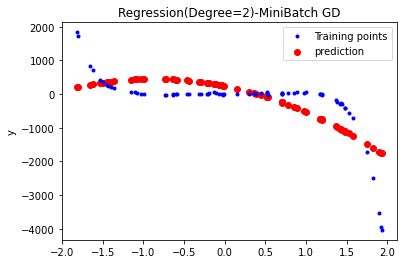

In [21]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=2)  #Degree of Polynomial fit
X_train_D3_sort=np.sort(scaled_X)
X_train_D3_trans = poly.fit_transform(X_train_D3_sort)

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(X_train_D3_trans,scaled_y.reshape(scaled_y.shape[0],))
# w, b, cost

w=w.reshape(-1,1).T  #.shape
X_train_D3_trans=X_train_D3_trans.T  #.shape
# b#
# w.shape,X_train_D3_trans.shape
scaled_y_pred = np.dot(w,X_train_D3_trans) + b


plt.ylabel("y")
plt.title("Regression(Degree=2)-MiniBatch GD")
plt.plot(scaled_X,scaled_y, "b.",label="Training points")
plt.scatter(scaled_X,scaled_y_pred.T, c="r",label="prediction")
plt.legend()
plt.show()

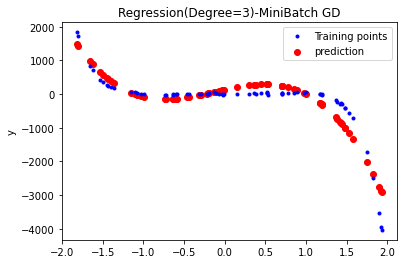

In [22]:

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=3)  #Degree of Polynomial fit
X_train_D3_sort=np.sort(scaled_X)
X_train_D3_trans = poly.fit_transform(X_train_D3_sort)

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(X_train_D3_trans,scaled_y.reshape(scaled_y.shape[0],))
# w, b, cost

w=w.reshape(-1,1).T  #.shape
X_train_D3_trans=X_train_D3_trans.T  #.shape
# b#
# w.shape,X_train_D3_trans.shape
scaled_y_pred = np.dot(w,X_train_D3_trans) + b


plt.ylabel("y")
plt.title("Regression(Degree=3)-MiniBatch GD")
plt.plot(scaled_X,scaled_y, "b.",label="Training points")
plt.scatter(scaled_X,scaled_y_pred.T, c="r",label="prediction")
plt.legend()
plt.show()

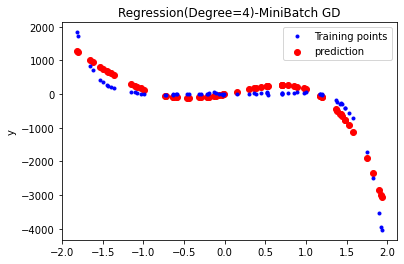

In [23]:

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=4)  #Degree of Polynomial fit
X_train_D3_sort=np.sort(scaled_X)
X_train_D3_trans = poly.fit_transform(X_train_D3_sort)

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(X_train_D3_trans,scaled_y.reshape(scaled_y.shape[0],))
# w, b, cost

w=w.reshape(-1,1).T  #.shape
X_train_D3_trans=X_train_D3_trans.T  #.shape
# b#
# w.shape,X_train_D3_trans.shape
scaled_y_pred = np.dot(w,X_train_D3_trans) + b


plt.ylabel("y")
plt.title("Regression(Degree=4)-MiniBatch GD")
plt.plot(scaled_X,scaled_y, "b.",label="Training points")
plt.scatter(scaled_X,scaled_y_pred.T, c="r",label="prediction")
plt.legend()
plt.show()